<a href="https://colab.research.google.com/github/SmitM1/House-Price-Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
#loading the dataset
df = pd.read_csv('/content/HousingData.csv')

In [3]:
df


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


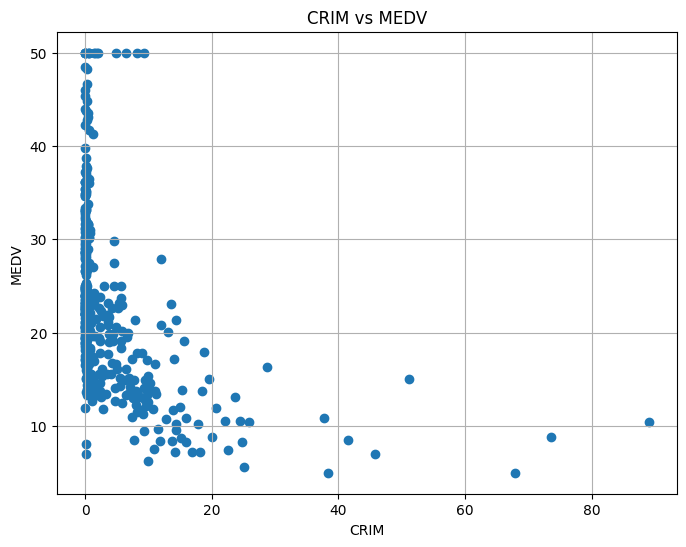

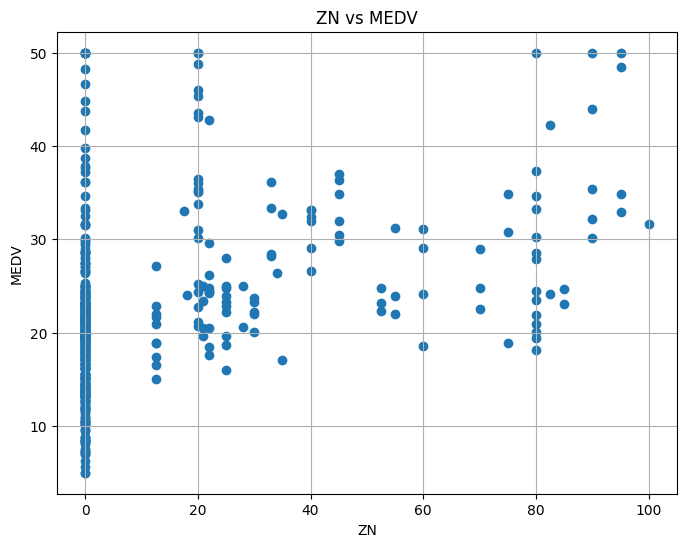

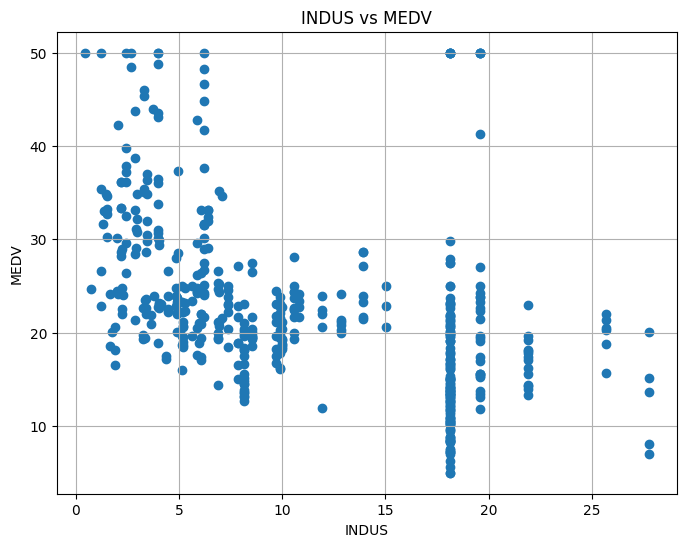

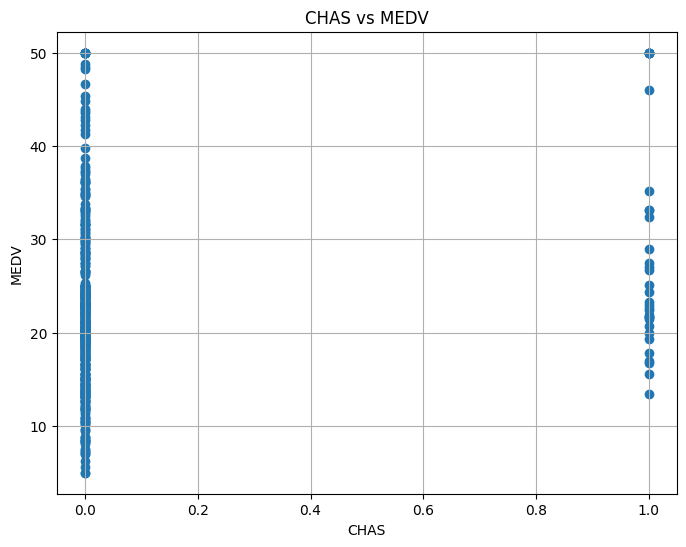

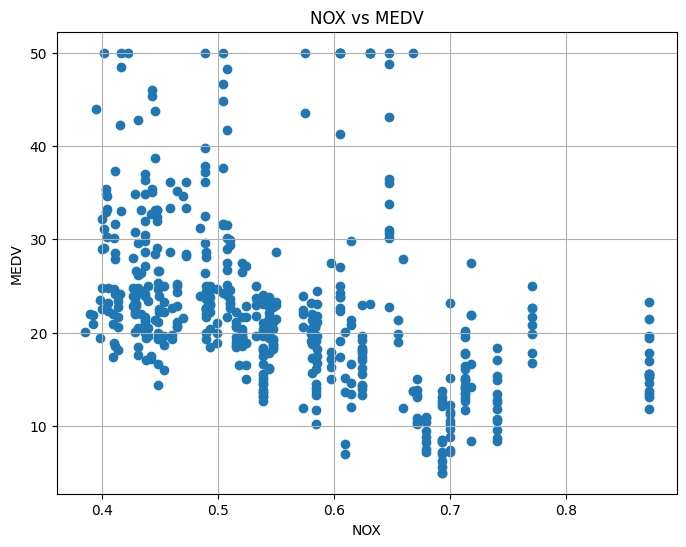

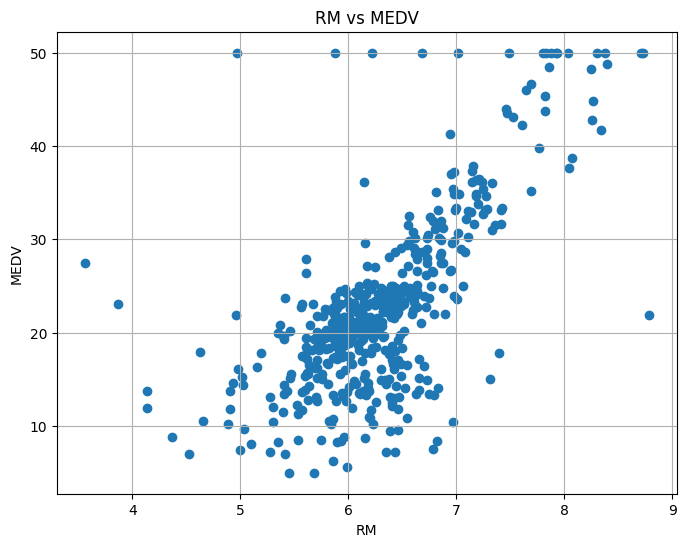

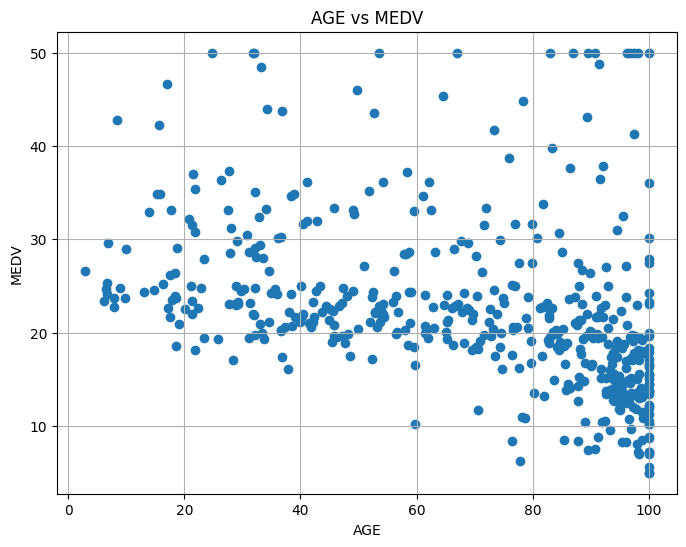

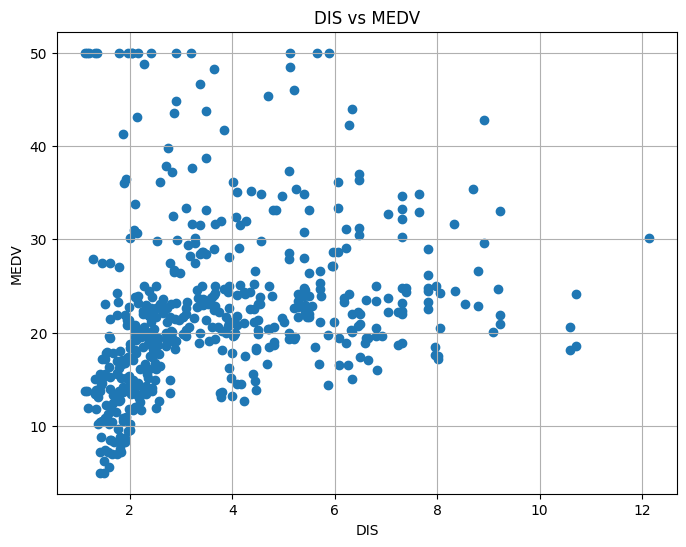

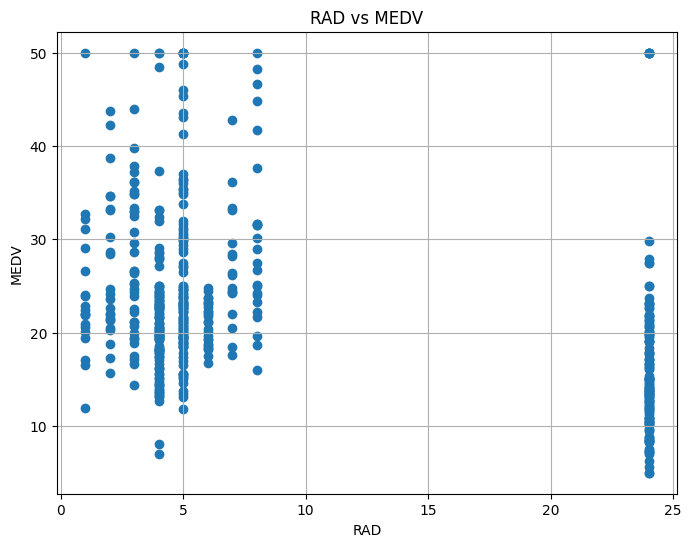

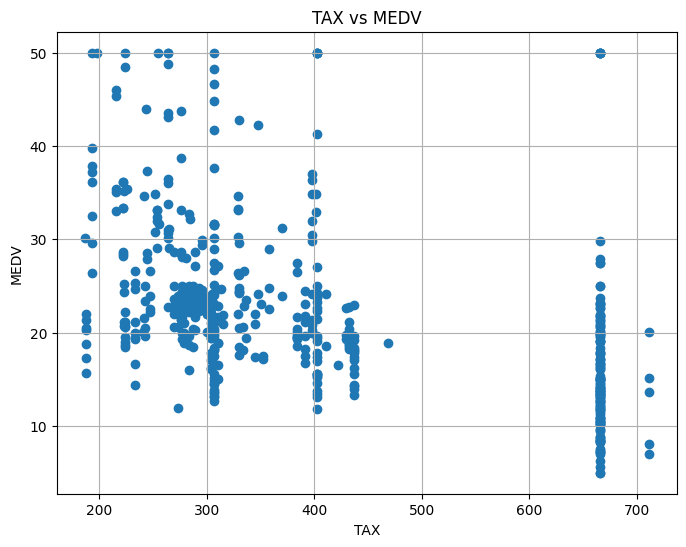

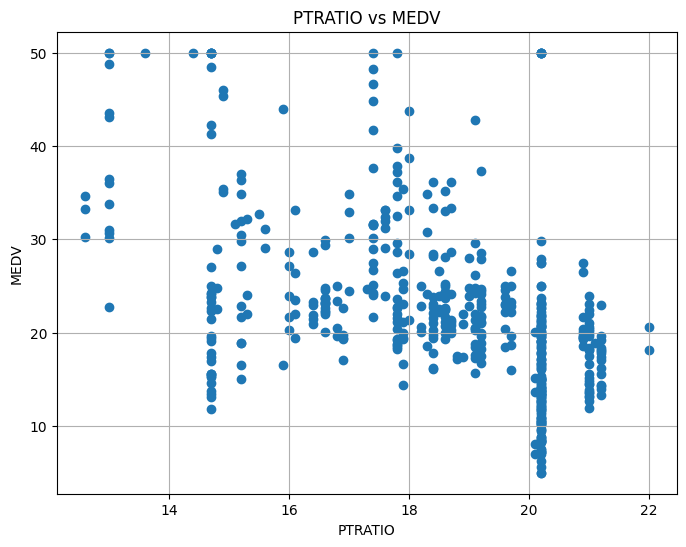

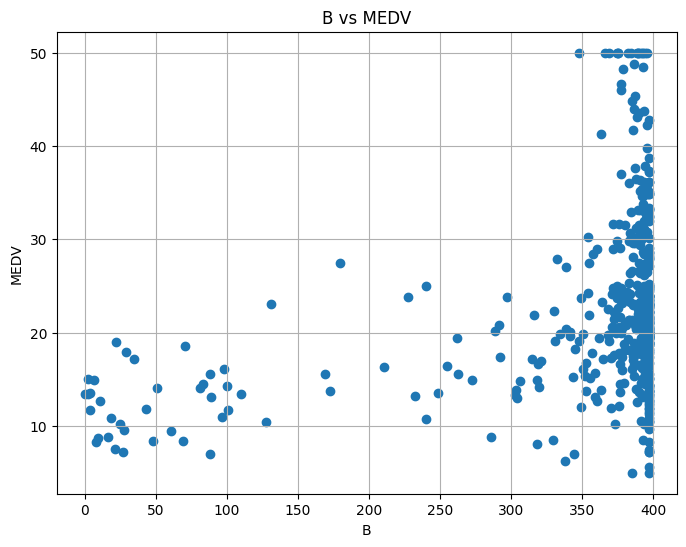

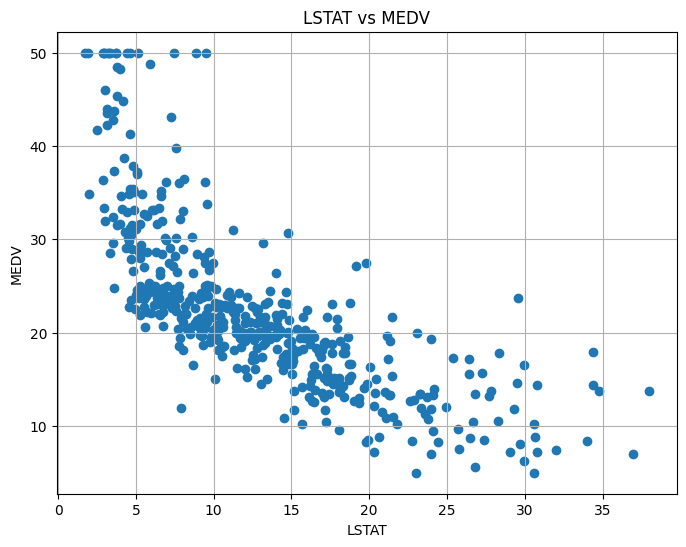

In [4]:
# Create scatter plots for each column against the Performance Index
columns_to_plot = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
for column in columns_to_plot:
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    plt.scatter(df[column], df['MEDV'])
    plt.xlabel(column)
    plt.ylabel('MEDV')
    plt.title(f'{column} vs MEDV')
    plt.grid(True)
    plt.show()

# Show the plot
plt.show()

In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
y = df['MEDV']
X = df.drop(['MEDV'], axis=1)

In [7]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [8]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [9]:
X_columns = X.columns
X_columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [10]:
scaler = StandardScaler()

In [11]:
X = scaler.fit_transform(X)

In [12]:
X

array([[-0.4138979 ,  0.2905253 , -1.28483988, ..., -1.45900038,
         0.44105193, -1.08210487],
       [-0.41148837, -0.47986431, -0.58779822, ..., -0.30309415,
         0.44105193, -0.50016501],
       [-0.41149066, -0.47986431, -0.58779822, ..., -0.30309415,
         0.39642699, -1.21499979],
       ...,
       [-0.40764849, -0.47986431,  0.12388718, ...,  1.17646583,
         0.44105193, -0.98977787],
       [-0.40204307, -0.47986431,  0.12388718, ...,  1.17646583,
         0.4032249 , -0.87227079],
       [-0.409181  , -0.47986431,  0.12388718, ...,  1.17646583,
         0.44105193, -0.67642564]])

In [13]:
X = pd.DataFrame(X, columns = X_columns)

In [14]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.413898,0.290525,-1.284840,-0.274265,-0.144217,0.413672,-0.118643,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.082105
1,-0.411488,-0.479864,-0.587798,-0.274265,-0.740262,0.194274,0.371156,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.500165
2,-0.411491,-0.479864,-0.587798,-0.274265,-0.740262,1.282714,-0.265225,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.215000
3,-0.410908,-0.479864,-1.303877,-0.274265,-0.835284,1.016303,-0.812226,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.367479
4,-0.406697,-0.479864,-1.303877,-0.274265,-0.835284,1.228577,-0.511911,1.077737,-0.752922,-1.106115,0.113032,0.441052,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.407434,-0.479864,0.123887,-0.274265,0.158124,0.439316,0.020789,-0.625796,-0.982843,-0.803212,1.176466,0.387217,NaN
502,-0.409427,-0.479864,0.123887,-0.274265,0.158124,-0.234548,0.292502,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.508558
503,-0.407648,-0.479864,0.123887,-0.274265,0.158124,0.984960,0.803751,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.989778
504,-0.402043,-0.479864,0.123887,-0.274265,0.158124,0.725672,0.742973,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.872271


In [15]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [16]:
X = X.fillna(0)

In [17]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.413898,0.290525,-1.284840,-0.274265,-0.144217,0.413672,-0.118643,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.082105
1,-0.411488,-0.479864,-0.587798,-0.274265,-0.740262,0.194274,0.371156,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.500165
2,-0.411491,-0.479864,-0.587798,-0.274265,-0.740262,1.282714,-0.265225,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.215000
3,-0.410908,-0.479864,-1.303877,-0.274265,-0.835284,1.016303,-0.812226,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.367479
4,-0.406697,-0.479864,-1.303877,-0.274265,-0.835284,1.228577,-0.511911,1.077737,-0.752922,-1.106115,0.113032,0.441052,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.407434,-0.479864,0.123887,-0.274265,0.158124,0.439316,0.020789,-0.625796,-0.982843,-0.803212,1.176466,0.387217,0.000000
502,-0.409427,-0.479864,0.123887,-0.274265,0.158124,-0.234548,0.292502,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.508558
503,-0.407648,-0.479864,0.123887,-0.274265,0.158124,0.984960,0.803751,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.989778
504,-0.402043,-0.479864,0.123887,-0.274265,0.158124,0.725672,0.742973,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.872271


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [19]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
319,-0.360042,-0.479864,-0.173381,-0.274265,-0.092387,-0.244520,-0.347454,0.098334,-0.637962,-0.619094,-0.025677,0.433706,0.002038
266,-0.324429,0.000000,-1.041754,-0.274265,0.797361,1.039097,0.574940,-0.790131,-0.523001,-0.856665,-2.522434,0.300379,0.290210
296,-0.408457,-0.479864,0.415297,-0.274265,-1.016689,0.376631,-0.626317,1.029344,-0.637962,-0.708183,-1.135347,0.396646,-0.744971
178,-0.406999,-0.479864,-1.030039,-0.274265,-0.386091,0.819700,0.210273,-0.418203,-0.523001,-0.666608,-0.857929,0.379323,-0.810719
406,1.963483,-0.479864,0.000000,-0.274265,0.901021,-3.058221,1.125517,-1.244014,1.661245,1.530926,0.806576,0.148523,1.486264
...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,-0.385696,-0.479864,-0.072339,-0.274265,-0.567496,-0.714658,0.149495,0.266139,-0.637962,-0.779455,0.066796,0.359148,0.000000
292,-0.410474,2.944090,0.000000,-0.274265,-1.241285,0.492028,-1.613064,0.628275,-0.637962,-0.969512,0.344213,0.441052,-1.121274
492,-0.401844,-0.479864,2.439061,-0.274265,0.469104,-0.429726,0.535614,-0.801065,-0.637962,1.798194,0.760340,0.441052,0.088769
168,-0.150550,-0.479864,1.244133,-0.274265,0.434551,0.048959,0.986085,-0.805771,-0.523001,-0.031105,-1.736418,-0.653301,-0.225982


In [20]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
146,-0.167235,0.000000,1.244133,-0.274265,2.732346,-0.935480,1.125517,-1.083101,-0.523001,-0.031105,-1.736418,-2.054765,0.550404
261,-0.353309,0.376124,-1.041754,-0.274265,0.797361,1.759974,0.746549,-0.786851,-0.523001,-0.856665,-2.522434,0.347526,-0.763157
9,-0.395104,0.055128,-0.470648,0.000000,-0.265154,-0.399808,0.621418,1.329635,-0.523001,-0.577519,-1.505237,0.329325,0.613355
474,0.510137,-0.479864,1.027405,-0.274265,0.253146,-1.221836,0.961059,-0.648994,1.661245,1.530926,0.806576,-0.044888,0.758839
487,0.140485,-0.479864,1.027405,-0.274265,0.244507,-0.540849,-0.547663,-0.305540,1.661245,1.530926,0.806576,0.345881,-0.177021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,-0.403599,1.232113,-0.684447,-0.274265,-0.930305,0.811152,-0.919481,0.224497,-0.637962,-0.916058,-0.395567,0.441052,-1.361884
108,-0.399927,-0.479864,-0.369607,-0.274265,-0.299707,0.269781,1.021837,-0.647521,-0.523001,-0.143951,1.130230,0.422851,-0.062311
145,-0.141488,-0.479864,1.244133,-0.274265,2.732346,-0.220301,1.125517,-1.129450,-0.523001,-0.031105,-1.736418,-2.014855,2.110171
124,-0.403317,-0.479864,2.133007,-0.274265,0.227231,-0.577891,0.975360,-0.850313,-0.867883,-1.308051,0.297977,0.248956,0.680501


In [21]:
y_train

319    21.0
266    30.7
296    27.1
178    29.9
406    11.9
       ... 
207    22.5
292    27.9
492    20.1
168    23.8
150    21.5
Name: MEDV, Length: 404, dtype: float64

In [22]:
y_test

146    15.6
261    43.1
9      18.9
474    13.8
487    20.6
       ... 
275    32.0
108    19.8
145    13.8
124    18.8
437     8.7
Name: MEDV, Length: 102, dtype: float64

In [23]:
lr = LinearRegression()

In [24]:
lr.fit(X_train, y_train)

LinearRegression()

In [25]:
predictions = lr.predict(X_test)

In [27]:
predictions.shape

(102,)

In [28]:
predictions_train = lr.predict(X_train)

In [31]:
mse_train = mean_squared_error(y_train, predictions_train)

In [32]:
mse_train

22.603832601549513

In [33]:
mse_test = mean_squared_error(y_test, predictions)

In [34]:
mse_test

24.592135396277676

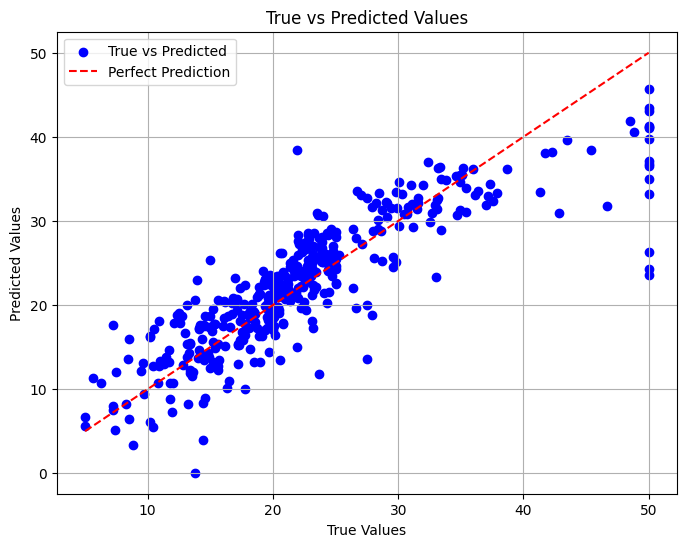

In [35]:
#Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_train, predictions_train, c='blue', label='True vs Predicted')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

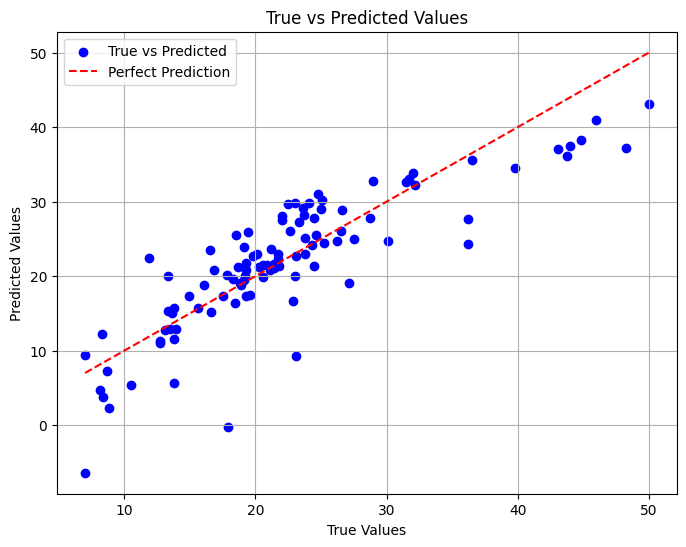

In [37]:
#Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, c='blue', label='True vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
X_train.head

<bound method NDFrame.head of          CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
319 -0.360042 -0.479864 -0.173381 -0.274265 -0.092387 -0.244520 -0.347454   
266 -0.324429  0.000000 -1.041754 -0.274265  0.797361  1.039097  0.574940   
296 -0.408457 -0.479864  0.415297 -0.274265 -1.016689  0.376631 -0.626317   
178 -0.406999 -0.479864 -1.030039 -0.274265 -0.386091  0.819700  0.210273   
406  1.963483 -0.479864  0.000000 -0.274265  0.901021 -3.058221  1.125517   
..        ...       ...       ...       ...       ...       ...       ...   
207 -0.385696 -0.479864 -0.072339 -0.274265 -0.567496 -0.714658  0.149495   
292 -0.410474  2.944090  0.000000 -0.274265 -1.241285  0.492028 -1.613064   
492 -0.401844 -0.479864  2.439061 -0.274265  0.469104 -0.429726  0.535614   
168 -0.150550 -0.479864  1.244133 -0.274265  0.434551  0.048959  0.986085   
150 -0.224455 -0.479864  1.244133 -0.274265  2.732346 -0.231698  0.000000   

          DIS       RAD       TAX   PTRATIO  

In [42]:
input_list = [[0.03, 0, 4, 0, 0.5, 6, 65, 5, 2, 250, 17, 395, 4]]

In [43]:
input_list = scaler.transform(input_list)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [44]:
input_list

array([[-0.41117957, -0.47986431, -1.0373608 , -0.27426491, -0.47247397,
        -0.40550685, -0.12579304,  0.57279952, -0.8678825 , -0.93981522,
        -0.67298414,  0.42021965, -1.21919647]])

In [45]:
input_list.shape

(1, 13)

In [48]:
input_list = input_list.reshape(1,-1)

In [49]:
input_list

array([[-0.41117957, -0.47986431, -1.0373608 , -0.27426491, -0.47247397,
        -0.40550685, -0.12579304,  0.57279952, -0.8678825 , -0.93981522,
        -0.67298414,  0.42021965, -1.21919647]])

In [50]:
prediction_input = lr.predict(input_list)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [51]:
prediction_input

array([26.21020132])